# Project One - visualization/test portfolio


In [21]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [22]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Yahoo Finance

In [23]:
#Downloading stock infromatino from Yahoo Finance
#aapl_df = yf.download("aapl", start='2016-04-05', end="2021-04-01")
#tsla_df2 = yf.download("tsla", start='2015-03-03', end="2019-04-23")
#amzn_df2 = yf.download("amzn", start='2015-03-03', end="2019-04-23")
#msft_df2 = yf.download("msft", start='2015-03-03', end="2019-04-23")
#goog_df2 = yf.download("goog", start='2015-03-03', end="2019-04-23")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
#aapl_df = aapl_df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
#tsla_df2 = tsla_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'TSLA'})
#amzn_df2 = amzn_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'AMZN'})
#msft_df2 = msft_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'MSFT'})
#goog_df2 = goog_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'GOOG'})

In [24]:
startdate = '2016-04-05'
today = datetime.today().strftime('%Y-%m-%d')

startdate, today

('2016-04-05', '2021-04-05')

In [25]:
aapl_price = web.DataReader('AAPL', data_source = 'yahoo', start = startdate, end = today)['Adj Close']


In [26]:
aapl_price

Date
2016-04-05     25.533810
2016-04-06     25.801216
2016-04-07     25.238501
2016-04-08     25.266407
2016-04-11     25.350115
                 ...    
2021-03-29    121.389999
2021-03-30    119.900002
2021-03-31    122.150002
2021-04-01    123.000000
2021-04-05    125.900002
Name: Adj Close, Length: 1259, dtype: float64

In [27]:
# daily return and volatiltiy
daily_return = aapl_price.pct_change()
daily_vol = daily_return.std()

daily_return, daily_vol

(Date
 2016-04-05         NaN
 2016-04-06    0.010473
 2016-04-07   -0.021810
 2016-04-08    0.001106
 2016-04-11    0.003313
                 ...   
 2021-03-29    0.001485
 2021-03-30   -0.012274
 2021-03-31    0.018766
 2021-04-01    0.006959
 2021-04-05    0.023577
 Name: Adj Close, Length: 1259, dtype: float64,
 0.019115172242048513)

In [36]:
last_price_aapl = aapl_price[-1]
last_price_aapl

125.9000015258789

In [41]:
# Monte Carlo Simulation setup
num_simu = 50
num_days = 252

simulation_df = pd.DataFrame()

In [42]:
for x in range(num_simu):
    count = 0
    daily_vol = daily_return.std()
    
    price_series = []
    
    prices = last_price_aapl*(1 + np.random.normal(0, daily_vol))
    price_series.append(prices)
    
    for y in range(num_days):
        if count == 251:
            break
        prices = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(prices)
        count += 1
    
    simulation_df[x] = price_series


simulation_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,126.632723,123.639375,126.053000,123.261410,127.613943,124.930002,126.419422,124.996416,120.899303,123.985913,...,126.172589,127.580869,125.486931,123.237845,125.169544,127.237542,124.772852,130.142404,126.609464,126.362103
1,127.196806,124.951646,129.638671,122.422714,126.770197,122.603929,127.565098,126.439875,121.248398,126.244153,...,127.535409,124.733139,130.674651,122.926660,124.631583,124.905995,124.218236,128.061897,128.197652,131.971885
2,125.495585,124.493617,129.739970,121.051967,127.622438,122.498258,124.463892,130.425484,118.543001,124.932533,...,124.991522,125.588178,129.772817,120.559896,123.043460,120.765211,119.806184,125.857905,132.988504,131.864827
3,126.984734,124.536241,133.589069,118.233716,130.611695,122.581570,123.495124,130.555053,121.038693,130.271533,...,121.967589,126.094917,129.800288,118.956020,125.052173,122.347890,123.987505,124.770367,132.160784,131.657114
4,130.711725,127.880422,135.176016,114.435896,132.883407,122.059337,119.849660,130.527459,119.502082,130.606167,...,125.601162,125.653676,131.565089,120.659325,126.428901,123.208110,128.718087,124.388079,134.012106,133.504675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,161.183385,132.794744,135.738506,161.232404,188.472124,87.190039,78.129711,137.137104,104.342176,151.609506,...,84.848456,100.428493,116.715380,129.260299,156.111666,138.173505,200.274636,214.336560,119.711067,96.661382
248,164.989199,130.601219,142.198588,160.056741,194.646961,89.972663,78.402412,135.404363,106.334393,148.690232,...,87.904177,97.743756,118.746789,129.907561,155.106816,141.512515,198.163535,216.871531,115.628094,99.084298
249,165.001086,129.775775,145.041383,165.824978,193.986861,91.444882,77.858742,134.919920,112.358449,154.478625,...,87.665966,96.205005,118.916048,129.998807,159.610788,136.215167,192.675983,223.159643,114.422963,99.691500
250,164.605626,130.378551,149.781584,165.218677,198.896415,90.650586,78.095613,134.806154,109.927908,152.737446,...,88.932941,95.663752,121.491995,126.960599,164.007693,136.712737,192.390706,223.881058,117.483137,99.925894


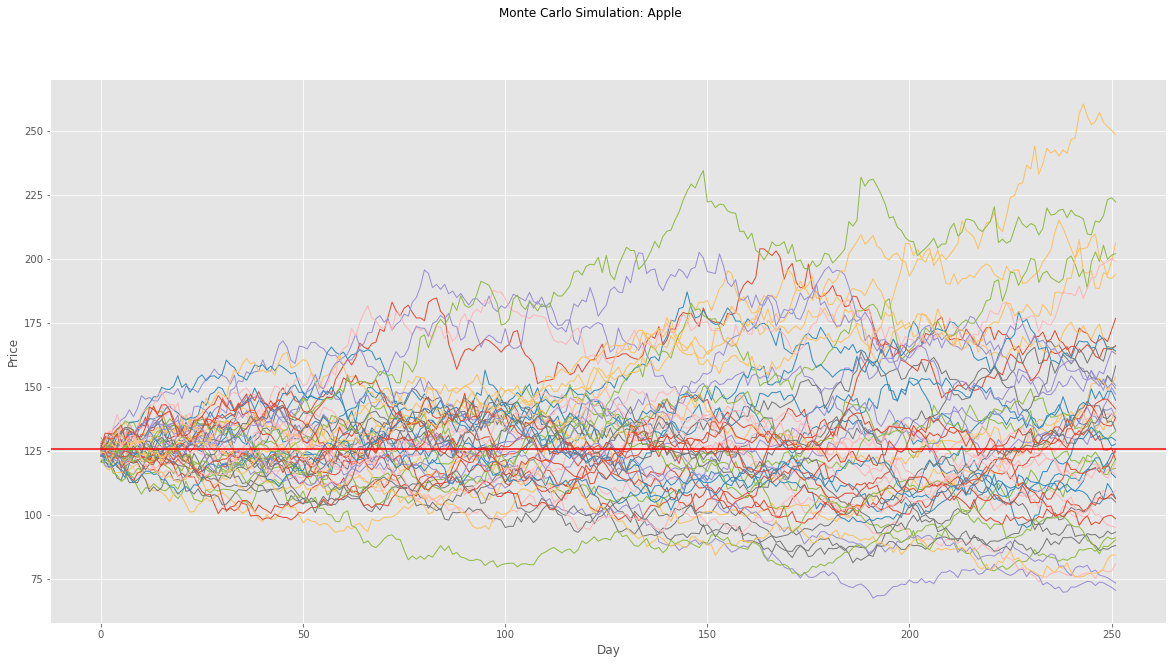

In [46]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Monte Carlo Simulation: Apple')
plt.plot(simulation_df, lw = 1)
plt.axhline(y = last_price_aapl, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_df.describe()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,163.955747,133.304351,135.328928,136.210557,163.061984,111.768901,106.760158,114.652568,131.063674,160.650897,...,119.039429,128.991158,126.801442,120.735050,163.182401,129.008262,153.530682,182.130287,111.378943,126.856173
std,17.373742,8.372833,8.598684,10.871001,26.765428,17.248958,15.243257,9.439285,11.855283,15.647640,...,15.038949,12.734668,12.940450,9.335248,20.168789,6.532723,22.415432,35.498743,9.566122,10.747728
min,125.495585,116.639321,114.326025,113.595793,125.956058,78.224443,73.900480,97.893087,104.342176,123.985913,...,84.848456,95.186855,104.051944,105.696442,123.043460,110.577563,115.293777,115.443930,92.923702,96.003054
25%,153.105829,126.647630,128.372622,128.347359,137.584193,99.372740,97.413170,107.495016,125.239549,151.986610,...,106.903562,120.723375,114.969533,113.361108,148.271021,124.602250,130.761256,151.235560,103.643844,121.631090
50%,165.921518,132.778623,136.013054,134.716315,152.233853,112.684166,109.322029,114.143655,133.615268,160.480107,...,122.704486,130.120857,126.622268,119.160105,163.892760,128.950319,158.262052,196.590429,113.805578,129.307805
75%,174.475884,139.245034,141.171696,142.265401,189.310525,122.130052,119.640087,121.079839,138.987669,171.366604,...,132.045718,138.781200,137.866118,126.680207,179.800525,133.709933,169.220692,210.880140,118.625350,133.446920
max,203.930678,153.565361,157.041024,165.897772,215.142740,151.002109,128.851309,142.849142,156.576982,195.701647,...,142.987980,149.685856,154.630623,146.911548,202.594862,142.283174,209.760892,234.508067,134.012106,148.204359
